# Sumatra project

## Location and Challenges

Sumatra is one of the largest islands in the work with very specific environmental conditions.
- Geology: Large mountain ranges associated to subduction and associated active volcanims with cataclysmic impacts 
- Huge rainfall and associated large rivers with high meandering activity
- Low-laying plains very impacted by monsoon and changes in sea level rise


Environmentally speaking, it is a key area for biodiversity as well as carbon sequestration

Impact of human activity in this part of the world is huge: 
- Deforestation for palm oil leading to subsidence of the coast 


Fluvial and maritime regimes are highly varied and depend on many factors: 
- Tectonic activity (uplift as well as seisms)
- Rainfall that can strongly impact river flows
- Sea level rise due to global warning 
- Changes in topography associated to human activity

These changes can have a huge impact for human population. 
The goal is not only to understand the possible impact of global warming, but also to find possible natural explanation for the fall of the Srivijaya empire. 

Objective of the project is to model the evolution of the coastline as well as the changes in the hydrographic system of Sumatra using recorded satellite images from the NASA and topography. 
In terms of ethnography, study should also help assess the possible impact of such changes to the lesser known Srivijaya empire, a powerful thalassocracy that disappeared in the XIIIth century



https://www.greenpeace.org/usa/issues/indonesian-forests-palm-oil/

https://www.greenpeace.org/usa/forests/Indonesia/

https://www.nature.com/articles/s41598-021-87460-z


https://www.sciencedirect.com/science/article/pii/S0078323421000634
    

# Components of the project
    

- Download data from URL
- Analyze images (outline of the channels, coastline, habitations, forests)
- Analyze 

# Data

NASA Earth Science Data collection includes:
- Atmosphere: Winds and precipitation, Temperature and Humidity
- Ocean: Surface topography
- Land: Cover and Usage, Topography and Eleation 
- Human Dimensions: Population and Land Use, Human and Environmental Health

Earth Science Data System Program is responsible for managing, processing, sharing data. All data and code is available.

Data has been recorded for over half a century.
EOSDIS is the the single largest repository of Earth Science data (40 Petabytes).
Amaong the different interesting centers are: 
- Land Processes Distributed Active Archive Center
- Crustal Dynamics Data Information System for Land subsidence

Datasets of interest:
- ASTER Global Water Bodies Database Attributes NetCDF V001
- ASTER Global Water Bodies Database NetCDF V001
- ASTER Global Digital Elevation Model NetCDF V003
- ASTER Global Digital Elevation Model Attributes NetCDF V003


Using SAR and computing interferometry, one can be able to show changes in elevation.
ASF List of datasets available: 
- Seasat - NASA - L Band (1978)
- AIRSAR - NASA - CLP-band (1990-2004)
- ERS - ESA - C Band - 1991-1997 - 1995-2011
- ALOS PALSAR - JAXA - L Band - 2006-2011

Sentinel-1 : Global coverage with C-band SAR - 2 satellites - launched in 2014 and 2016
- GRD (Ground Range Deteted): amplitude / not corrected for 
- SLC: Needed for interferometry
- ALOS Palsar RTC Products and Sentinel-1 Interferograms
- UAVSAR: Amplitude, Correlation, Interferometry, Digital Elevation Map

Processing recipes: asf.alaska.edu/how-to/data-recipes/data-recipe-tutorials
List of recipes: 
- Radiometric Terain Correction 
- InSAR (Interferometry)
- Inundation Mapping 
- Environmental Change Detection

In [5]:
!ls GFCC30SR_p124r062_5dx19940531.SR


ls: GFCC30SR_p124r062_5dx19940531.SR: No such file or directory


In [6]:
!pwd


/Users/pierre/code/PJousselin/Final_project/Sumatra


In [7]:
image_1994 = 'Data/GFCC30SR_p124r062_5dx19940531.SR/p124r062_5dx19940531.SR.QA.tif'
image_2009 = 'Data/GFCC30SR_p124r062_7x20090804.SR/p124r062_7dx20090804.SR.QA.tif'


In [8]:
import matplotlib as plt
from PIL import Image
from IPython.display import display

img1 = Image.open(DEM, 'r')
img1.show()

NameError: name 'DEM' is not defined

In [9]:
type(img1)

NameError: name 'img1' is not defined

In [10]:
import numpy as np
imarray = np.array(img1) 
imarray.shape 

NameError: name 'img1' is not defined

In [11]:
imarray.dtype

NameError: name 'imarray' is not defined

In [12]:
import seaborn as sns
sns.histplot(imarray)

NameError: name 'imarray' is not defined

In [ ]:
imarray.count_values


# DEM

Displaying Digital elevation model from **ASTER Global Digital Elevation Model V003**

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

Jambi_DEM = 'Data/ASTGTMV003_S02E103_dem.tif'
Jambi_NUM = 'Data/ASTGTMV003_S02E103_num.tif'

# Open the DEM with Rasterio
with rio.open(Jambi_DEM) as src:
    Jambi_elevation = src.read(1)
    # Set masked values to np.nan
    # elevation[elevation < 0] = np.nan

with rio.open(Jambi_NUM) as src:
    Jambi_num = src.read(1)
    
# Create hillshade
Jambi_hillshade = es.hillshade(elevation)

# Plot the data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ep.plot_bands(
    Jambi_elevation,
    ax=axs[0],
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade - 2000 to 2013 acquisition",
    vmin=0,
    vmax=50
)
axs[0].imshow(hillshade, cmap="Greys", alpha=0.5)

ep.plot_bands(
    Jambi_num,
    ax=axs[1],
    cmap="RdYlGn",
    title="Lidar Number of measurements used for Elevation Model\n 2000 to 2013 acquisitions",
    vmin=0,
    vmax=20
)


plt.show()

RasterioIOError: Data/ASTGTMV003_S02E103_dem.tif: No such file or directory

In [ ]:
Jambi_Water_bodies = 'Data/ASTWBDV001_S02E103/ASTWBDV001_S02E103_att.tif'
Jambi_DEM = 'Data/ASTWBDV001_S02E103/ASTWBDV001_S02E103_dem.tif'

with rio.open(Jambi_Water_bodies) as src:
    Jambi_Water_bodies = src.read(1)
    
with rio.open(Jambi_DEM) as src:
    Jambi_elevation = src.read(1)
    
# Create hillshade
Jambi_hillshade = es.hillshade(Jambi_elevation)

# Plot the data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ep.plot_bands(
    Jambi_elevation,
    ax=axs[0],
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade - 2000 to 2013 acquisition",
    #vmin=-100, 
    #vmax=100
)
#axs[0].imshow(Jambi_hillshade, cmap="Greys", alpha=0.5)

ep.plot_bands(
    Jambi_Water_bodies,
    ax=axs[1],
    cmap="Paired",
    title="Water Bodies Classification",
)


plt.show()

In [15]:
! ls Data/

ASTWBDV001_S02E103               GFCC30SR_p124r062_7x20090804.SR
Elevation                        Palembang Time Lapse
GFCC30SR_p124r062_5dx19940531.SR Sentinel_2


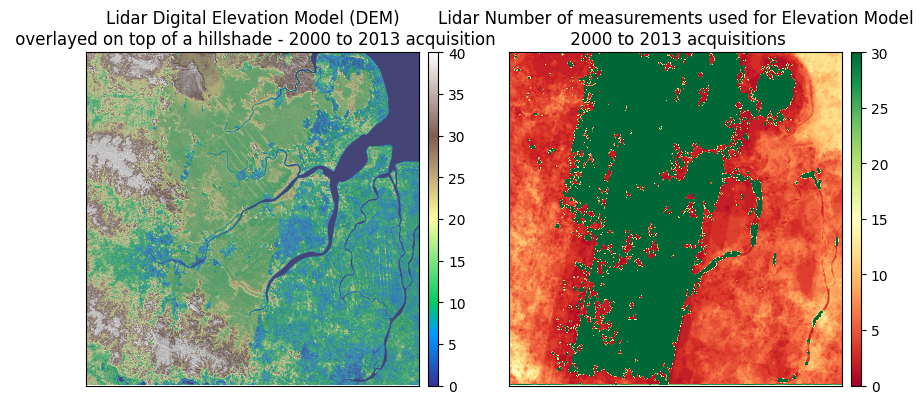

In [16]:
Palembang_DEM = 'Data/Elevation/ASTGTMV003_S03E104_dem.tif'
Palembang_NUM = 'Data/Elevation/ASTGTMV003_S03E104_num.tif'

# Open the DEM with Rasterio
with rio.open(Palembang_DEM) as src:
    Palembang_elevation = src.read(1)
    # Set masked values to np.nan
    # elevation[elevation < 0] = np.nan

with rio.open(Palembang_NUM) as src:
    Palembang_num = src.read(1)
    
# Create hillshade
Palembang_hillshade = es.hillshade(Palembang_elevation)

# Plot the data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ep.plot_bands(
    Palembang_elevation,
    ax=axs[0],
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade - 2000 to 2013 acquisition",
    vmin=0,
    vmax=40
)
axs[0].imshow(Palembang_hillshade, cmap="Greys", alpha=0.5)

ep.plot_bands(
    Palembang_num,
    ax=axs[1],
    cmap="RdYlGn",
    title="Lidar Number of measurements used for Elevation Model\n 2000 to 2013 acquisitions",
    vmin=0,
    vmax=30
)


plt.show()



ASTER Digital Elevation Model V003 images are not directly available for transfer

ASTER Digital Elevation Model V003 also requires request

AST_L1T v003
ASTER Level 1 Precision Terrain Corrected Registered At-Sensor Radiance Is ok for download

In [ ]:
Jambi_R_2013 = 'Data/Sentinel_2/Jambi/HLS.L30.T48MUD.2013178T031922.v2.0.B04.tif'
Jambi_G_2013 = 'Data/Sentinel_2/Jambi/HLS.L30.T48MUD.2013178T031922.v2.0.B03.tif'
Jambi_B_2013 = 'Data/Sentinel_2/Jambi/HLS.L30.T48MUD.2013178T031922.v2.0.B02.tif'

#Jambi_R_2022 = 'Data/ASTGTMV003_S03E104_num.tif'
#Jambi_G_2013 = 'Data/ASTGTMV003_S03E104_num.tif'
#Jambi_B_2013 = 'Data/ASTGTMV003_S03E104_num.tif'


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Open the bands with Rasterio
with rio.open(Palembang_DEM) as src:
    Palembang_elevation = src.read(1)
    # Set masked values to np.nan
    # elevation[elevation < 0] = np.nan


ep.plot_rgb(
    Palembang_elevation,
    ax=axs[0],
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade - 2000 to 2013 acquisition",
    vmin=0,
    vmax=40
)
axs[0].imshow(Palembang_hillshade, cmap="Greys", alpha=0.5)


# Playing with data 

https://aws.amazon.com/free/